In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
mr = pd.read_csv("IMDB Dataset.csv")
#hmlt tag
mr['review'] = mr['review'].replace({'<.*?>': ''}, regex = True)
# lower case
mr['review'] = mr['review'].str.lower()
mr.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [5]:
words_mr = [review.lower().split() for review in mr['review']]

In [6]:
# List of all words across tweets
all_mr = list(itertools.chain(*words_mr))

# Create counter
countsall = collections.Counter(all_mr)

countsall.most_common(15)

[('the', 640480),
 ('a', 316783),
 ('and', 313811),
 ('of', 286693),
 ('to', 264638),
 ('is', 204891),
 ('in', 180040),
 ('i', 142472),
 ('this', 138997),
 ('that', 130168),
 ('it', 129848),
 ('was', 93267),
 ('as', 88420),
 ('with', 84624),
 ('for', 84582)]

In [12]:
clean_mr = pd.DataFrame(counts_sw.most_common(20),
                             columns=['words', 'count'])
clean_mr.head()

,words,count
0,the,640480
1,a,316783
2,and,313811
3,of,286693
4,to,264638


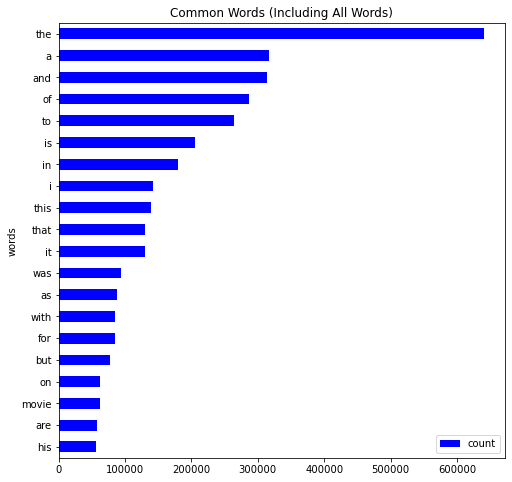

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_mr.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words (Including All Words)")

plt.show()

In [10]:
#3
mr = pd.read_csv("IMDB Dataset.csv")
def preprocess_text(data):
    stop = stopwords.words('english')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~'''
    #print(stop)
    data['review'] = data['review'].replace({'<.*?>': ''}, regex = True)  
    #Make lower
    data['review'] = data['review'].str.lower()
    #Remove stopwords
    data['review'] = data['review'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    #Remove punctuations
    data['review'] = data['review'].replace({'<.*?>': ' '}, regex = True)  
    data['review'] = data['review'].replace({'[^a-zA-Z]': ' '}, regex = True)
    data['review'] = data['review'].replace({'[0-9]': ' '}, regex = True)
    data['review'] = data['review'].replace({r"\s+[a-zA-Z]\s+": ' '}, regex = True)
    data['review'] = data['review'].replace({r'\s+': ' '}, regex = True)
    data['word_count'] = data['review'].str.split().str.len()
    
    return data
mrp = preprocess_text(mr)
mrp.head()

,review,sentiment,word_count
0,one reviewers mentioned watching oz episode ho...,positive,175
1,wonderful little production filming technique ...,positive,89
2,thought wonderful way spend time hot summer we...,positive,88
3,basically there family little boy jake thinks ...,negative,68
4,petter mattei love time money visually stunnin...,positive,128


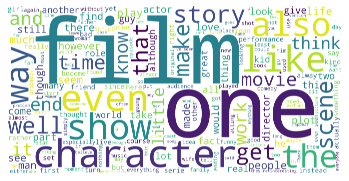

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = mr.review.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = '', width=8000,height=4000,min_font_size=30, background_color="white").generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [15]:
words_mr_pre = [review.lower().split() for review in mr['review']]
# List of all words across tweets
all_words_pre = list(itertools.chain(*words_mr_pre))

# Create counter
counts_pre = collections.Counter(all_words_pre)
counts_pre.most_common(15)

[('movie', 87937),
 ('film', 79676),
 ('one', 53585),
 ('like', 40160),
 ('good', 29737),
 ('it', 29600),
 ('the', 27263),
 ('time', 25099),
 ('even', 24856),
 ('would', 24599),
 ('story', 23110),
 ('really', 23090),
 ('see', 23021),
 ('well', 21260),
 ('much', 19316)]

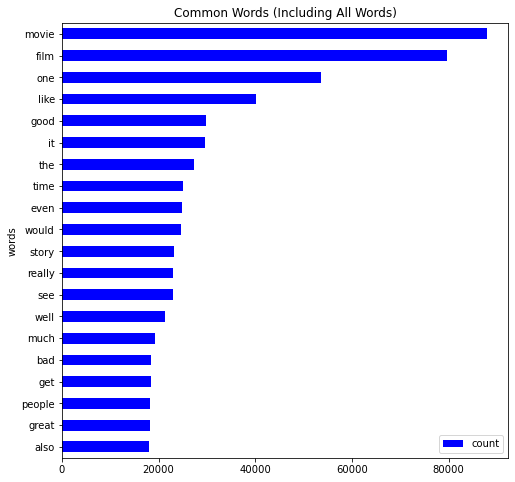

In [16]:
clean_mr = pd.DataFrame(counts_pre.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_mr.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Common Words (Including All Words)")
plt.show()

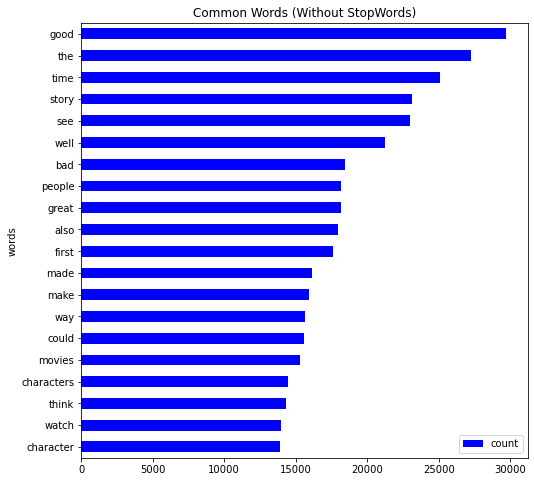

In [17]:
collection_words = ['movie', 'film','much','it','even','would','really','like','one','get']
words_mr_nc = [[w for w in word if not w in collection_words]
                 for word in words_mr_pre]
all_words_nc = list(itertools.chain(*words_mr_nc))

# Create counter
counts_nc = collections.Counter(all_words_nc)

clean_mr = pd.DataFrame(counts_nc.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_mr.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Common Words (Without StopWords)")
plt.show()

In [19]:
#Get word count
mr = pd.read_csv("IMDB Dataset.csv")
mr['word_count']=mr['review'].str.lower().str.len()
mr

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


In [25]:
plt.figure(figsize=(12,6))

sns.stripplot(x=mr.count, y=mr.sentiment, data=mr);

plt.show()

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

<Figure size 864x432 with 0 Axes>

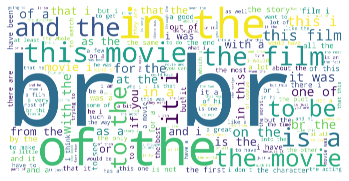

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = mr.review.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = '', width=8000,height=4000,min_font_size=30, background_color="white").generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [7]:
positive_wordcnt.describe()

count    25000.000000
mean      1324.797680
std       1031.492627
min         65.000000
25%        691.000000
50%        968.000000
75%       1614.000000
max      13704.000000
Name: word_count, dtype: float64

In [8]:
negative_wordcnt.describe()

count    25000.000000
mean      1294.064360
std        945.892669
min         32.000000
25%        706.000000
50%        973.000000
75%       1567.250000
max       8969.000000
Name: word_count, dtype: float64

In [11]:
pos =  mr['review'][mr['sentiment']=="positive"]
neg =  mr['review'][mr['sentiment']=="negative"]

In [5]:
words_pos = pos.str.split()
# List of all words across tweets
list_pos = list(itertools.chain(*words_pos))

# Create counter
counts_pos = collections.Counter(list_pos)
counts_pos.most_common(15)

[('film', 42095),
 ('movie', 37846),
 ('one', 27312),
 ('like', 17709),
 ('good', 15020),
 ('it', 14548),
 ('the', 14108),
 ('great', 12961),
 ('story', 12932),
 ('time', 12746),
 ('well', 12724),
 ('see', 12271),
 ('also', 10792),
 ('really', 10736),
 ('would', 10594)]

In [6]:
words_neg = neg.str.split()
# List of all words across tweets
list_neg = list(itertools.chain(*words_neg))

# Create counter
counts_neg = collections.Counter(list_neg)
counts_neg.most_common(15)

[('movie', 50091),
 ('film', 37581),
 ('one', 26273),
 ('like', 22451),
 ('even', 15243),
 ('it', 15052),
 ('good', 14717),
 ('bad', 14714),
 ('would', 14005),
 ('the', 13155),
 ('really', 12354),
 ('time', 12353),
 ('see', 10750),
 ('story', 10178),
 ('get', 10129)]

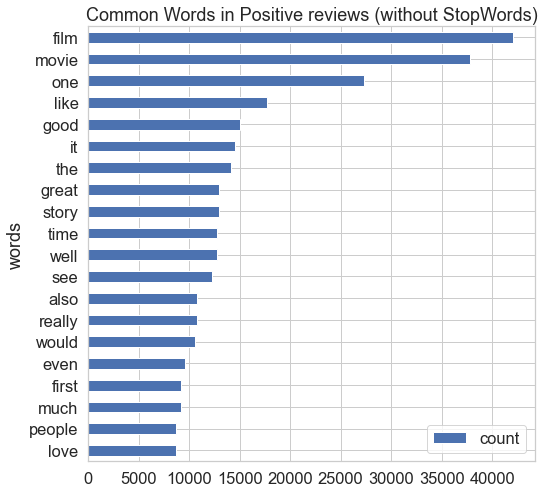

In [19]:
pos1 = pd.DataFrame(counts_pos.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
pos1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax)
ax.set_title("Common Words in Positive reviews (without StopWords)")
plt.show()

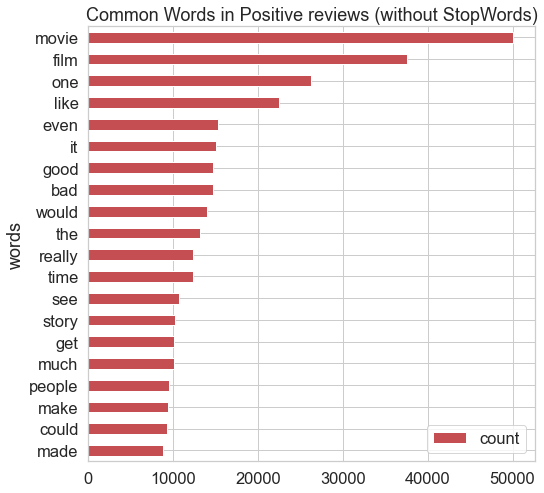

In [20]:
neg1 = pd.DataFrame(counts_neg.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
neg1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                       color = 'r'               )
ax.set_title("Common Words in Negative reviews (without StopWords)")
plt.show()

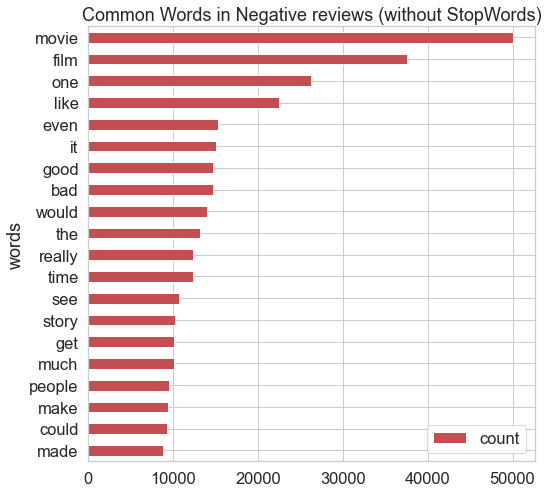

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
neg1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                       color = 'r'               )
ax.set_title("Common Words in Negative reviews (without StopWords)")
plt.show()

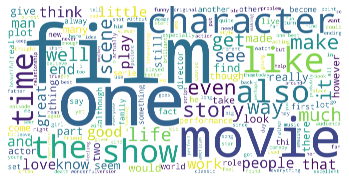

In [24]:
text = pos.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = '', width=8000,height=4000,min_font_size=30, background_color="white").generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

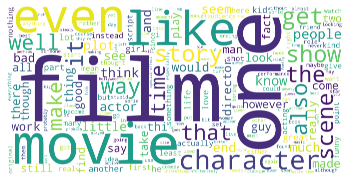

In [25]:
text = neg.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = '', width=8000,height=4000,min_font_size=30, background_color="white").generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [11]:
from nltk import pos_tag
tag = nltk.pos_tag(list_pos)

In [12]:
tag

[('one', 'CD'),
 ('reviewers', 'NNS'),
 ('mentioned', 'VBD'),
 ('watching', 'VBG'),
 ('oz', 'JJ'),
 ('episode', 'NN'),
 ('hooked', 'VBD'),
 ('right', 'RB'),
 ('exactly', 'RB'),
 ('happened', 'VBD'),
 ('me', 'PRP'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('thing', 'NN'),
 ('struck', 'VBD'),
 ('oz', 'JJ'),
 ('brutality', 'NN'),
 ('unflinching', 'VBG'),
 ('scenes', 'NNS'),
 ('violence', 'NN'),
 ('set', 'VBN'),
 ('right', 'RB'),
 ('word', 'NN'),
 ('go', 'VB'),
 ('trust', 'IN'),
 ('me', 'PRP'),
 ('show', 'VBP'),
 ('faint', 'JJ'),
 ('hearted', 'VBN'),
 ('timid', 'JJ'),
 ('show', 'NN'),
 ('pulls', 'VBZ'),
 ('punches', 'NNS'),
 ('regards', 'NNS'),
 ('drugs', 'NNS'),
 ('sex', 'NN'),
 ('violence', 'NN'),
 ('hardcore', 'NN'),
 ('classic', 'JJ'),
 ('use', 'NN'),
 ('word', 'NN'),
 ('it', 'PRP'),
 ('called', 'VBD'),
 ('oz', 'RP'),
 ('nickname', 'JJ'),
 ('given', 'VBN'),
 ('oswald', 'RP'),
 ('maximum', 'JJ'),
 ('security', 'NN'),
 ('state', 'NN'),
 ('penitentary', 'JJ'),
 ('focuses', 'NNS'),
 ('mainly', 

In [13]:
counts_tag = collections.Counter(tag)
counts_tag.most_common(15)

[(('film', 'NN'), 42095),
 (('movie', 'NN'), 37846),
 (('one', 'CD'), 27104),
 (('like', 'IN'), 16654),
 (('good', 'JJ'), 14744),
 (('it', 'PRP'), 14548),
 (('the', 'DT'), 14108),
 (('great', 'JJ'), 12961),
 (('story', 'NN'), 12932),
 (('time', 'NN'), 12746),
 (('well', 'RB'), 12438),
 (('also', 'RB'), 10792),
 (('really', 'RB'), 10736),
 (('would', 'MD'), 10594),
 (('even', 'RB'), 9585)]

<AxesSubplot:>

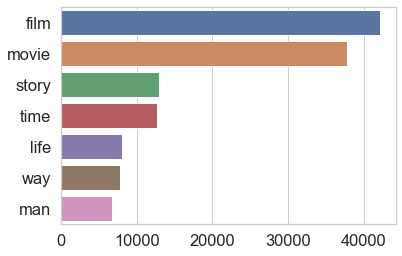

In [17]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(text)
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj

noun=get_adjs(list_pos)
count_noun=collections.Counter(noun)

x,y=list(map(list,zip(*count_noun.most_common(7))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

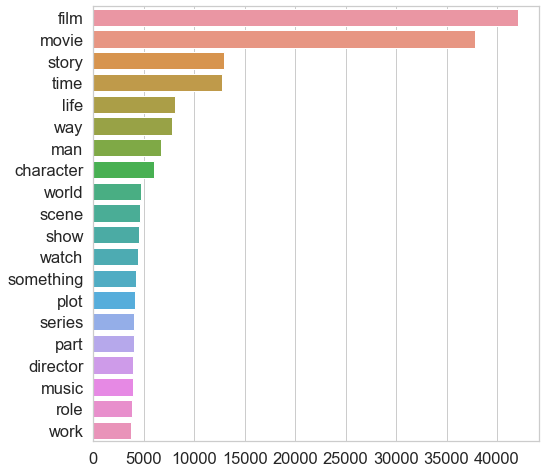

In [19]:
#noun positive
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*count_noun.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

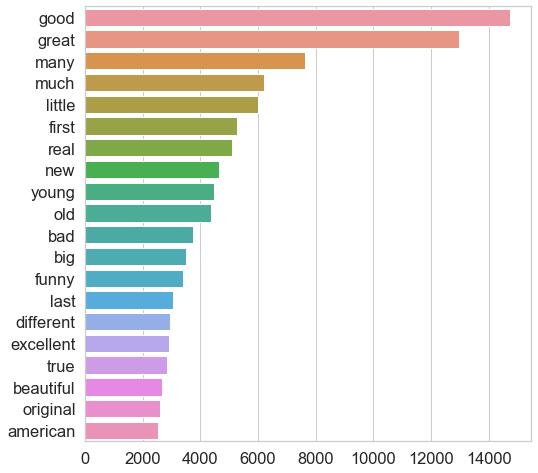

In [20]:
def get_adj(text):
    adj=[]
    pos=nltk.pos_tag(text)
    for word,tag in pos:
        if tag=='JJ':
            adj.append(word)
    return adj

adj=get_adj(list_pos)
count_adj=collections.Counter(adj)

fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*count_adj.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

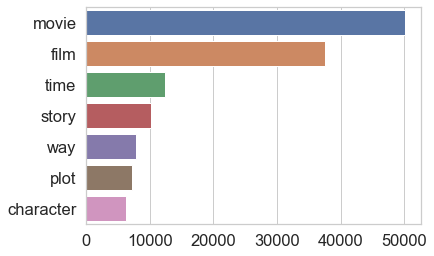

In [21]:
def get_NN(text):
    noun=[]
    pos=nltk.pos_tag(text)
    for word,tag in pos:
        if tag=='NN':
            noun.append(word)
    return noun

noun=get_NN(list_neg)
count_noun=collections.Counter(noun)

x,y=list(map(list,zip(*count_noun.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

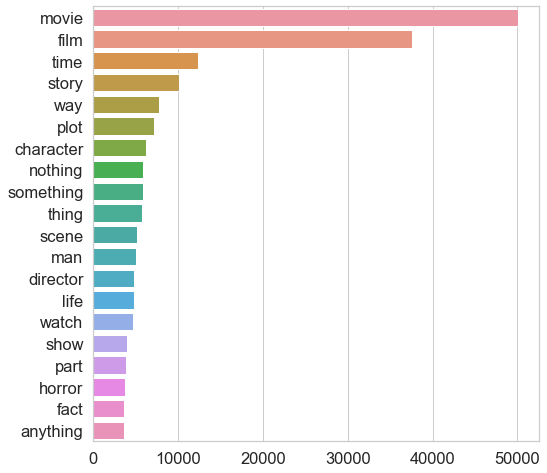

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*count_noun.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

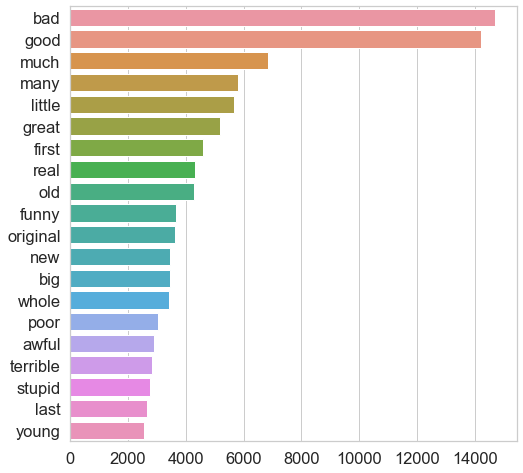

In [23]:
def get_adj(text):
    adj=[]
    pos=nltk.pos_tag(text)
    for word,tag in pos:
        if tag=='JJ':
            adj.append(word)
    return adj

adj=get_adj(list_neg)
count_adj=collections.Counter(adj)

fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*count_adj.most_common(20))))
sns.barplot(x=y,y=x)

In [8]:
words_mr = [review.lower().split() for review in mr['review']]
# List of all words
all_mr = list(itertools.chain(*words_mr))

from nltk import pos_tag
tag_all = nltk.pos_tag(all_mr)
count_all = collections.Counter(tag_all)


TypeError: Expected tuple, got str

In [9]:
count_all

Counter({('one', 'CD'): 53142,
         ('reviewers', 'NNS'): 487,
         ('mentioned', 'VBD'): 654,
         ('watching', 'VBG'): 8554,
         ('oz', 'JJ'): 79,
         ('episode', 'NN'): 2347,
         ('hooked', 'VBD'): 163,
         ('right', 'RB'): 2166,
         ('exactly', 'RB'): 1963,
         ('happened', 'VBD'): 1652,
         ('me', 'PRP'): 5968,
         ('the', 'DT'): 27263,
         ('first', 'JJ'): 9871,
         ('thing', 'NN'): 9173,
         ('struck', 'VBD'): 168,
         ('brutality', 'NN'): 138,
         ('unflinching', 'VBG'): 17,
         ('scenes', 'NNS'): 9902,
         ('violence', 'NN'): 2060,
         ('set', 'VBN'): 3324,
         ('word', 'NN'): 1868,
         ('go', 'VB'): 4550,
         ('trust', 'IN'): 64,
         ('show', 'VBP'): 2873,
         ('faint', 'JJ'): 31,
         ('hearted', 'VBN'): 195,
         ('timid', 'JJ'): 30,
         ('show', 'NN'): 8562,
         ('pulls', 'VBZ'): 135,
         ('punches', 'NNS'): 113,
         ('regards', '

In [15]:
def get_adj(data):
    adj=[]
    for word,tag in data:
        if tag=='JJ':
            adj.append(word)
    return adj

In [43]:
def get_N(data):
    noun=[]
    for word,tag in data:
        if tag=='NN' or tag== 'NNS':
            noun.append(word)
    return noun

In [46]:
def get_NN(data):
    noun=[]
    for word,tag in data:
        if tag=='NN':
            noun.append(word)
    return noun

In [29]:
def get_V(data):
    verb=[]
    for word,tag in data:
        if tag=='VB' or tag=='VBD' or tag=='VBP':
            verb.append(word)
    return verb

In [30]:
JJ_all=get_adj(tag_all)
allJJ=collections.Counter(JJ_all)

<AxesSubplot:>

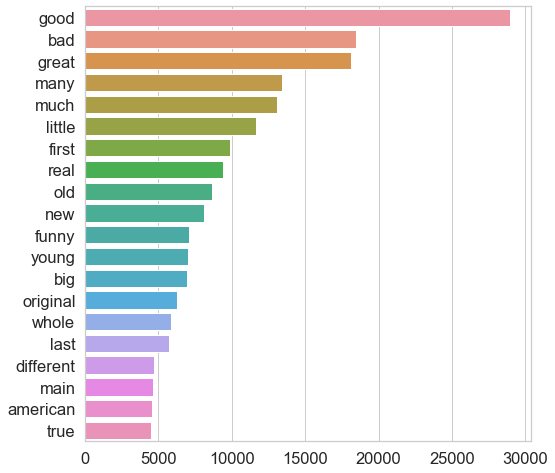

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*allJJ.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

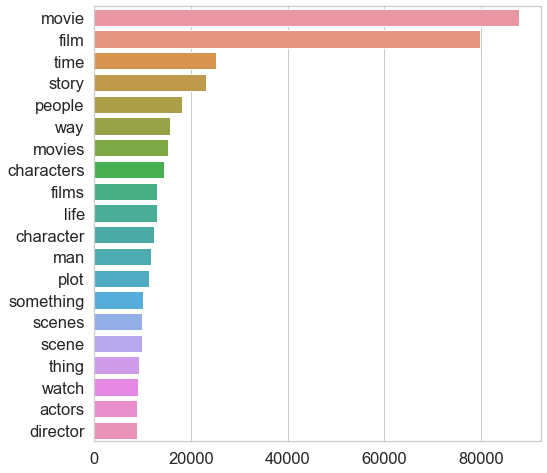

In [44]:
#have NNS
NN_all=get_N(tag_all)
allNN=collections.Counter(NN_all)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*allNN.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

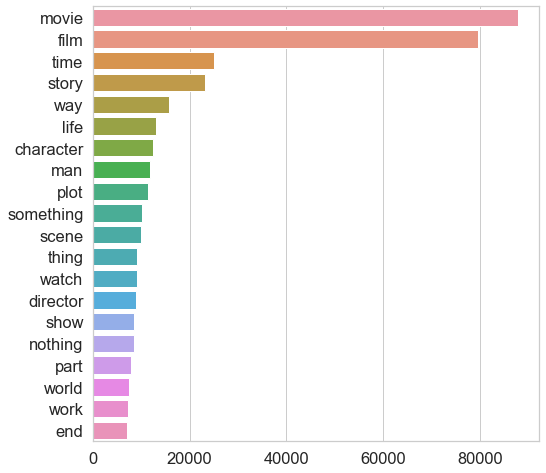

In [50]:
#no NNS
N_all=get_NN(tag_all)
allN=collections.Counter(N_all)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*allN.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

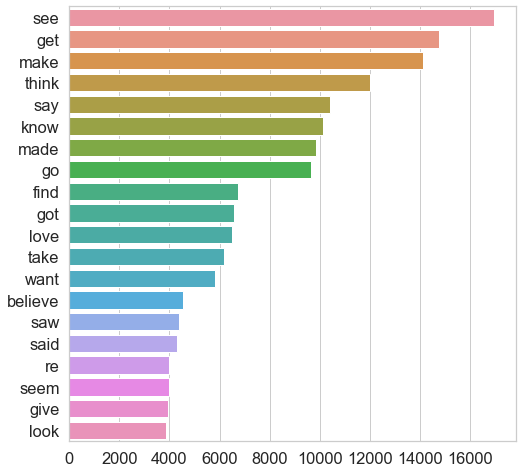

In [31]:
VB_all=get_V(tag_all)
allVB=collections.Counter(VB_all)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*allVB.most_common(20))))
sns.barplot(x=y,y=x)

In [33]:
pos =  mr['review'][mr['sentiment']=="positive"]
neg =  mr['review'][mr['sentiment']=="negative"]

In [34]:
words_pos = pos.str.split()
# List of all words
tag_posi = list(itertools.chain(*words_pos))

from nltk import pos_tag
tagpos = nltk.pos_tag(tag_posi)

<AxesSubplot:>

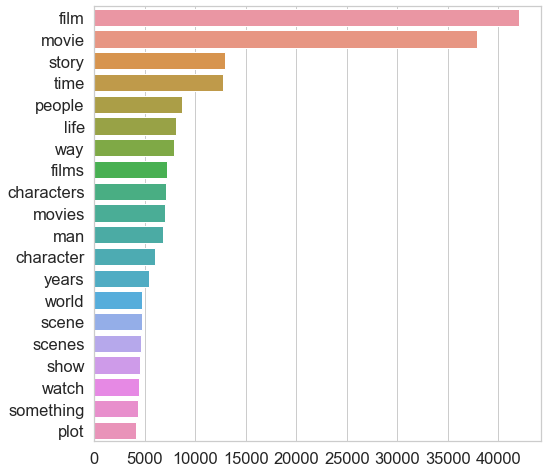

In [45]:
#have NNS
NN_pos=get_N(tagpos)
posNN=collections.Counter(NN_pos)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*posNN.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

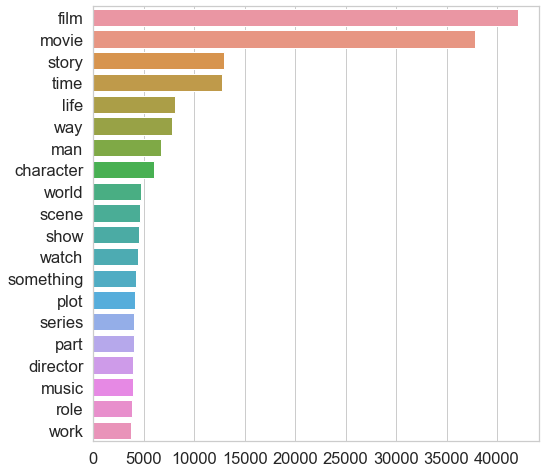

In [52]:
#no NNS
N_pos=get_NN(tagpos)
posN=collections.Counter(N_pos)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*posN.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

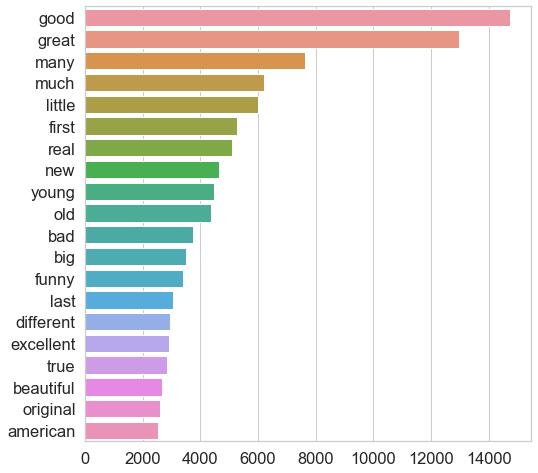

In [36]:
JJ_pos=get_adj(tagpos)
posJJ=collections.Counter(JJ_pos)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*posJJ.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

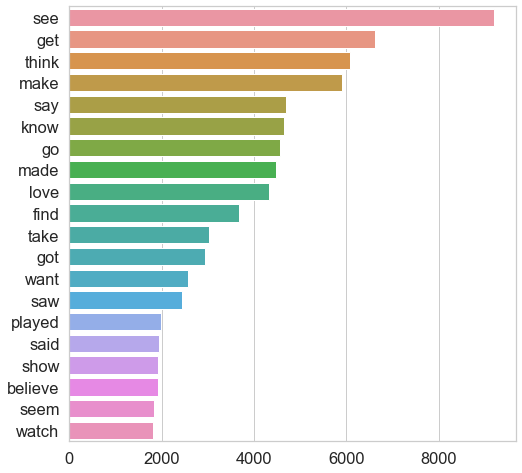

In [38]:
VB_pos=get_V(tagpos)
posVB=collections.Counter(VB_pos)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*posVB.most_common(20))))
sns.barplot(x=y,y=x)

In [39]:
words_neg = neg.str.split()
# List of all words
tag_neg = list(itertools.chain(*words_neg))

from nltk import pos_tag
tagneg = nltk.pos_tag(tag_neg)

<AxesSubplot:>

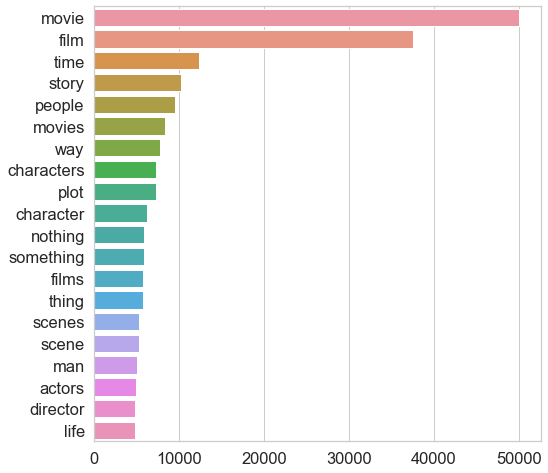

In [47]:
NN_neg=get_N(tagneg)
negNN=collections.Counter(NN_neg)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*negNN.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

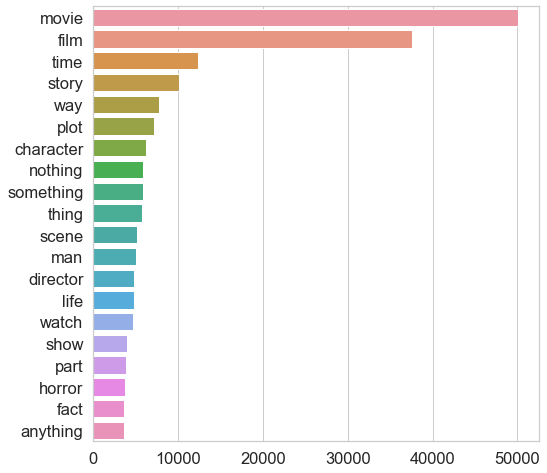

In [48]:
N_neg=get_NN(tagneg)
negN=collections.Counter(N_neg)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*negN.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

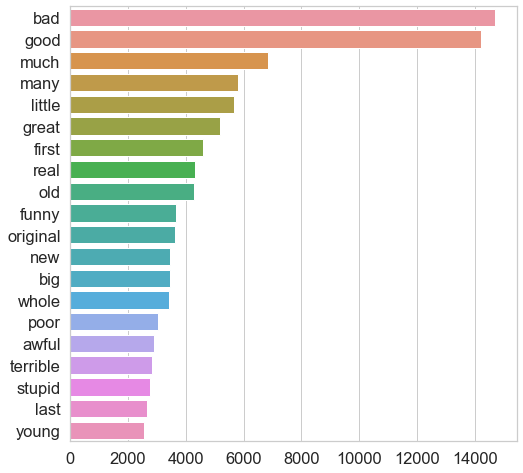

In [41]:
JJ_neg=get_adj(tagneg)
negJJ=collections.Counter(JJ_neg)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*negJJ.most_common(20))))
sns.barplot(x=y,y=x)

<AxesSubplot:>

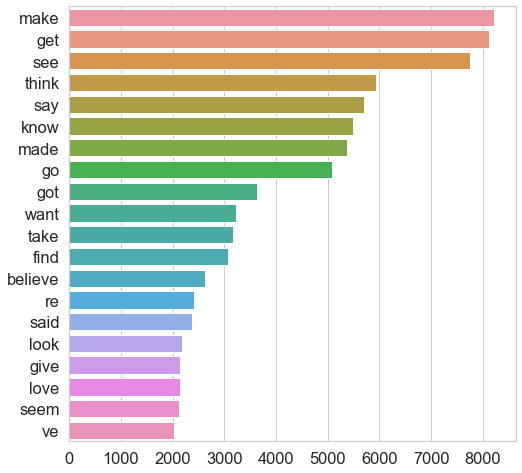

In [42]:
VB_neg=get_V(tagneg)
negVB=collections.Counter(VB_neg)
fig, ax = plt.subplots(figsize=(8, 8))
x,y=list(map(list,zip(*negVB.most_common(20))))
sns.barplot(x=y,y=x)

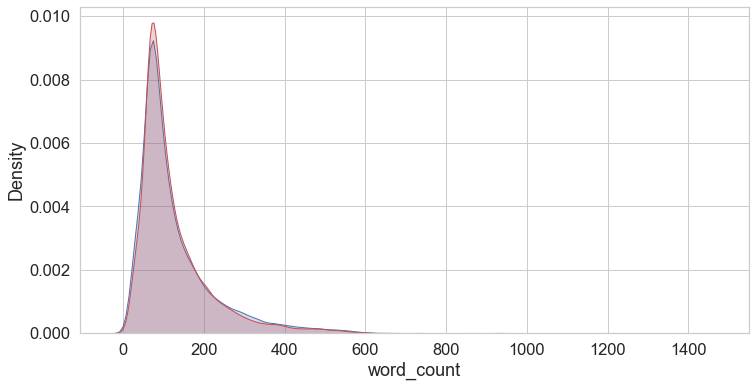

In [4]:
plt.figure(figsize=(12,6))

positive_wordcnt =  mr['word_count'][mr['sentiment']=="positive"]
pos_plot = sns.kdeplot(positive_wordcnt,color='b',shade=True)
negative_wordcnt = mr['word_count'][mr['sentiment']=="negative"]
neg_plot = sns.kdeplot(negative_wordcnt,color='r',shade=True)

In [5]:
positive_wordcnt.describe()

count    25000.000000
mean       126.313400
std         97.989903
min          6.000000
25%         66.000000
50%         93.000000
75%        155.000000
max       1437.000000
Name: word_count, dtype: float64

In [6]:
negative_wordcnt.describe()

count    25000.000000
mean       123.590880
std         90.272982
min          3.000000
25%         67.000000
50%         93.000000
75%        150.000000
max        860.000000
Name: word_count, dtype: float64

In [7]:
pos = pd.DataFrame(data = pos)

In [18]:
pos

0        one reviewers mentioned watching oz episode ho...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
4        petter mattei love time money visually stunnin...
5        probably all time favorite movie story selfles...
                               ...                        
49983    loved it fan original series always wondered b...
49985    imaginary heroes clearly best film year comple...
49989    got one weeks ago love it modern light filled ...
49992    john garfield plays marine blinded grenade fig...
49995    thought movie right good job creative original...
Name: review, Length: 25000, dtype: object

In [14]:
neg

3        basically there family little boy jake thinks ...
7        show amazing fresh innovative idea first aired...
8        encouraged positive comments film looking forw...
10       phil alien one quirky films humour based aroun...
11       saw movie came out recall scariest scene big b...
                               ...                        
49994    typical junk comedy there almost laughs genuin...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    i going disagree previous comment side maltin ...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 25000, dtype: object

In [16]:
neg[10]

'phil alien one quirky films humour based around oddness everything rather actual punchlines at first odd pretty funny movie progressed find jokes oddness funny anymore its low budget film thats never problem itself pretty interesting characters eventually lost interest imagine film would appeal stoner currently partaking for something similar better try brother another planet '

In [17]:
mr['review'][10]

'phil alien one quirky films humour based around oddness everything rather actual punchlines at first odd pretty funny movie progressed find jokes oddness funny anymore its low budget film thats never problem itself pretty interesting characters eventually lost interest imagine film would appeal stoner currently partaking for something similar better try brother another planet '

In [30]:
mr = pd.read_csv("IMDB Dataset.csv")
mr['count'] = mr['review'].str.lower().str.len()
mr

,review,sentiment,count
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.swarmplot(x = 'sentiment', y = 'count', data = mrp)
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

In [7]:
mr['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [14]:
mr['count'] = mr['review'].str.split().str.len()

In [15]:
count = mr['count']

In [13]:
mrp['review'][4]

'petter mattei love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat the thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter the acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive we wish mr mattei good luck await anxiously next work '

Text(0.5, 1.0, 'Kernel Distribution of Number of words')

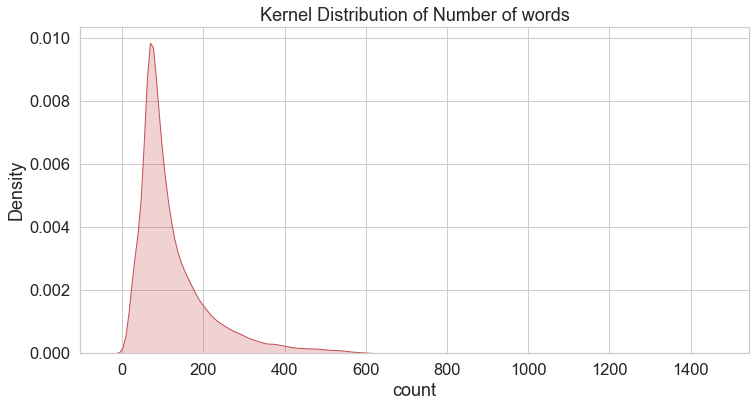

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.kdeplot(count,shade=True,color='r').set_title('Kernel Distribution of Number of words')

In [18]:
count.describe()

count    50000.000000
mean       124.952140
std         94.219381
min          3.000000
25%         67.000000
50%         93.000000
75%        152.000000
max       1437.000000
Name: count, dtype: float64

In [19]:
countp = mrp['count']
countp.describe()

count    50000.000000
mean       124.952140
std         94.219381
min          3.000000
25%         67.000000
50%         93.000000
75%        152.000000
max       1437.000000
Name: count, dtype: float64

In [20]:
pos =  mrp[mrp['sentiment']=="positive"]
neg =  mrp[mrp['sentiment']=="negative"]